In [1]:
import numpy as np
import pandas as pd
import pyreadr
import os
import matplotlib.pyplot as plt

In [2]:
def convert_params(filename, exp, model, transform = True, save = True):
    path = f'../data/{exp}/data/'
    data = pyreadr.read_r(path+model+"_"+filename+".RData")[filename].to_numpy()
    if transform:
        data[:,0] = np.log(data[:,0])
        data[:,1] = np.log(data[:,1]/(2-data[:,1]))
    if save:
        np.save(file = path+filename+".npy", arr = data)
    else:
        return data

In [3]:
def convert_data(filename, exp, model, transform = True, save = True):
    path = f'../data/{exp}/data/'
    data = pyreadr.read_r(path+model+"_"+filename+".RData")[filename].to_numpy()
    img_shape = int(np.sqrt(data.shape[0]))
    data = np.reshape(data, newshape = (img_shape, img_shape, -1))
    if transform:
        data = np.log(data)
    if save:
        np.save(file = path+filename+".npy", arr = data)
    else:
        return data

# Plot data for Brown-Resnick

In [22]:
exp = "exp_2"
model = "brown"
plot_path = f'../data/{exp}/plots/'

test_params = convert_params("test_params", exp, model, transform = False, save = False)
test_data = convert_data("test_data", exp, model, transform = False, save = False)

In [23]:
param_comb = np.unique(test_params, axis = 0)
n_comb = param_comb.shape[0]

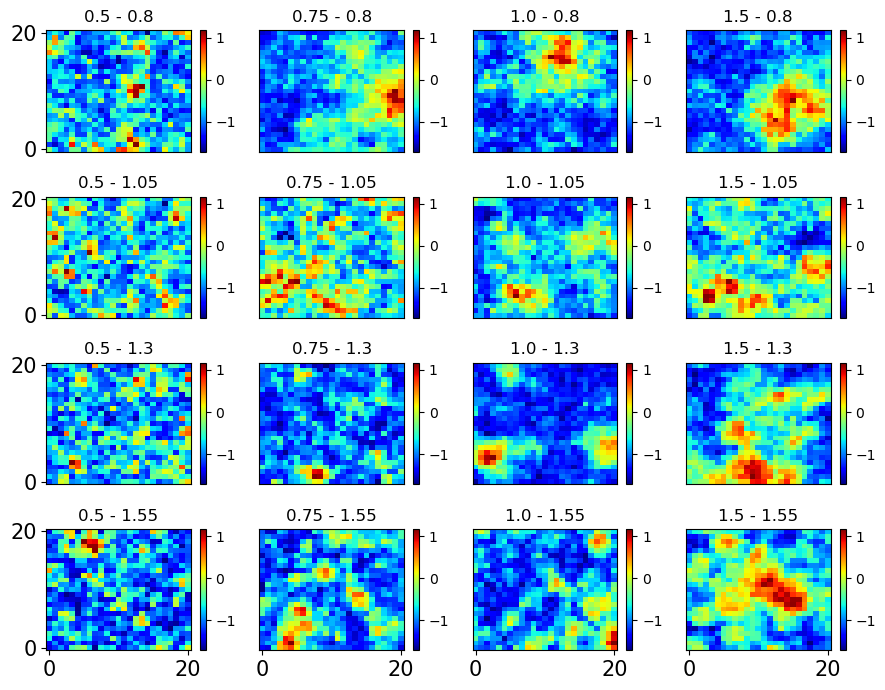

In [24]:
fig, axs = plt.subplots(4,4,figsize = (9,7))
axs = axs.ravel()
x = np.linspace(0,20,25)
for i in range(n_comb):
    sample = np.random.randint(low = (i*50), high = ((i+1)*50))
    params = test_params[(i*50+2),:]
    data_plot = np.log(test_data[:,:,sample])
    #mean = data_plot.mean()
    #std = data_plot.std()
    #data_plot = (data_plot-mean)/std
    axs[i].pcolormesh(x, x, data_plot, cmap = "jet")
    axs[i].tick_params(axis='both', which='major', labelsize=15)
    axs[i].set_title(f"{params[0]} - {params[1]}")
    fig.colorbar(pcol, ax=axs[i])
    if i < 12:
        axs[i].get_xaxis().set_visible(False)
    if (i%4) != 0:
        axs[i].get_yaxis().set_visible(False)  
        
fig.tight_layout()

#plt.savefig(plot_path+"brown_sim_2.png", dpi = 300, bbox_inches = "tight")

# Plot data for Schlather-Model

In [25]:
exp = "exp_2"
model = "schlather"
plot_path = f'../data/{exp}/plots/'

test_params = convert_params("test_params", exp, model, transform = False, save = False)
test_data = convert_data("test_data", exp, model, transform = False, save = False)

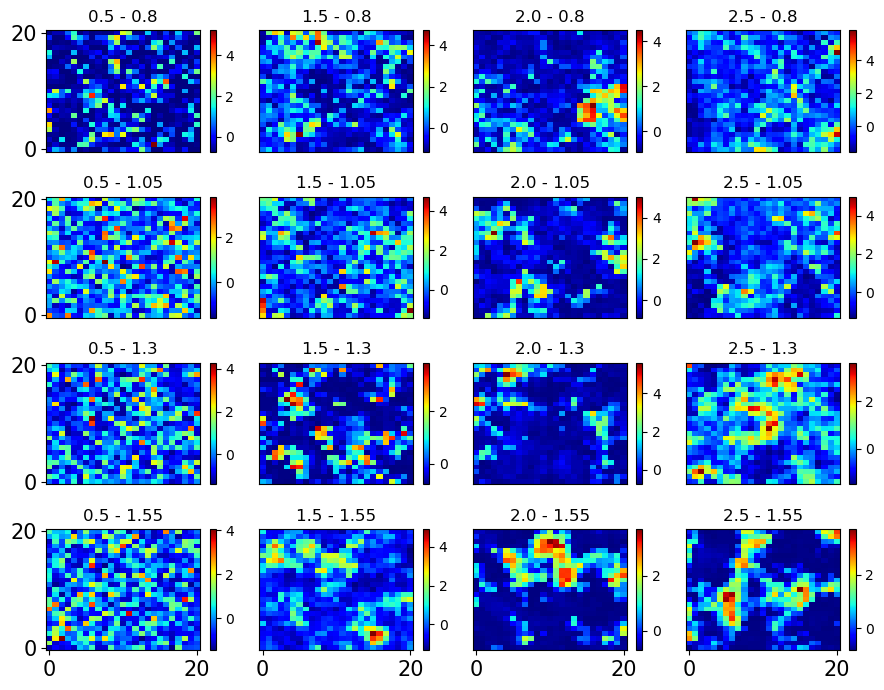

In [27]:
fig, axs = plt.subplots(4,4,figsize = (9,7))
axs = axs.ravel()#np.swapaxes(axs,0,1).ravel()
x = np.linspace(0,20,25)
for i in range(n_comb):
    sample = np.random.randint(low = (i*50), high = ((i+1)*50))
    params = test_params[(i*50+2),:]
    data_plot = test_data[:,:,sample]
    mean = data_plot.mean()
    std = data_plot.std()
    data_plot = (data_plot-mean)/std
    pcol = axs[i].pcolormesh(x, x, data_plot, cmap = "jet")
    axs[i].tick_params(axis='both', which='major', labelsize=15)
    axs[i].set_title(f"{params[0]} - {params[1]}")
    fig.colorbar(pcol, ax=axs[i])
    if i < 12:
        axs[i].get_xaxis().set_visible(False)
    if (i%4) != 0:
        axs[i].get_yaxis().set_visible(False)  
        
fig.tight_layout()

#plt.savefig(plot_path+"schlather_sim_2.png", dpi = 300, bbox_inches = "tight")

# Plot distribution for parameters in training set

In [28]:
brown_params = convert_params("train_params", exp, "brown", transform = False, save = False)
schlather_params = convert_params("train_params", exp, "schlather", transform = False, save = False)

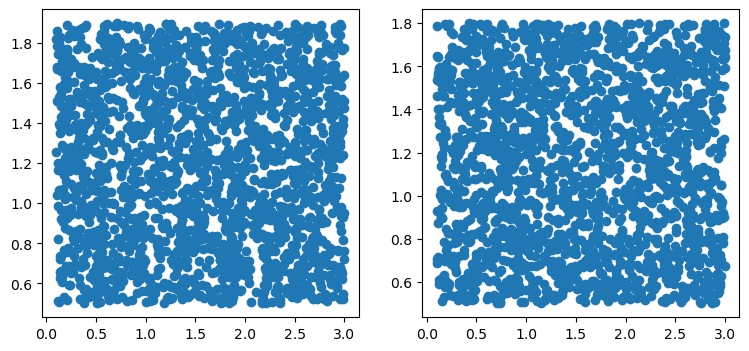

In [30]:
fig, axs = plt.subplots(1,2,figsize = (9,4))
axs[0].scatter(x = brown_params[:,0], y = brown_params[:,1])
axs[1].scatter(x = schlather_params[:,0], y = schlather_params[:,1])
axs = axs.ravel()